# **Python code for cloud object analysis**
<font size="2">Cloud object range: 70E~150E - 26S~26N </font><br />
    
<font size="2">Time range: 2006/06~2015/12 </font><br />
    
<font size="2">Convective cloud definition: cloud base < 2km & cloud top > 6km</font><br />

<font size="3"><font color="#b22222">**Classification features**</font> <br />

<font size="2"><font color="#1e90ff">**Basic features:**</font><br />
    
<font size="2">Cloud top</font><br />
<font size="2">Cloud size (cloud pixel numbers)</font><br />
<font size="2">Horizontal scale (along the track)</font><br />
<br />
<font size="2"><font color="#1e90ff">**Convective strength features:**</font><br />
    
<font size="2">0 dBz >10km</font> <br />
<font size="2">10 dBz >10km</font>

<img src='img/scale_demo.png' width = "600"/>

### 5 convective cloud object types:

<img src='img/type_sample.png'  />

### their max precipitation:

<img src="img/max_pcp_event_log.png" width="700" align=left>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
##your own path
os.environ['PROJ_LIB'] = 'D:\\program\\anaconda3\\Library\\share\\'
##
from mpl_toolkits.basemap import Basemap
import pickle

In [2]:
with open('cloudsat_cloud_info_1011_5type.pkl', 'rb') as f:
    clouds = pickle.load(f)
with open('cloudsat_cluster_info_1011_5type.pkl', 'rb') as f:
    hca = pickle.load(f)
typenum=5

In [3]:
#0 granual    1 julian     2 cloud num      3 lat           4 lon            5 size           6 top           7 bot                     8 landsea 
#9   0dbz mask          10  0dbz h            11  10dbz mask             12  10dbz h           13 max dBz           14 max h           
#15edge         16 edge           17 hori          18 system
print('Cloud object array:')
print(clouds.shape)

Cloud object array:
(113382, 19)


In [4]:
cluster_num=np.arange(113382)
cloudobject_demo = pd.DataFrame(clouds[:,:] ,index=cluster_num[:])

In [5]:
cloudobject_demo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,703.0,166.0,747.0,18.76,142.26,434.0,8138.0,705.0,2.0,0.0,0.0,0.0,0.0,16.7,6221.0,35131.0,35150.0,20.0,0.0
1,703.0,166.0,767.0,13.79,141.14,1027.0,11372.0,1064.0,2.0,0.0,0.0,0.0,0.0,11.4,4180.0,35607.0,35693.0,87.0,767.0
2,703.0,166.0,771.0,13.05,140.98,896.0,9698.0,1066.0,2.0,0.0,0.0,0.0,0.0,8.6,6819.0,35703.0,35761.0,59.0,771.0
3,703.0,166.0,774.0,12.22,140.79,1549.0,12823.0,1077.0,2.0,0.0,0.0,0.0,0.0,7.4,8026.0,35791.0,35847.0,57.0,778.0
4,703.0,166.0,778.0,11.43,140.62,3098.0,13310.0,617.0,2.0,1.0,11880.0,1.0,10442.0,15.9,6606.0,35856.0,35940.0,85.0,778.0


In [6]:
print('Cluster array:')
print(hca.shape)
print(hca[0:10,])
print('Coastal intense array:')
cloudinfo=clouds[hca==2,:]
print(cloudinfo.shape)

Cluster array:
(113382,)
[0 0 0 0 3 0 1 0 3 1]
Coastal intense array:
(4901, 19)


## Clustering result :
<font size="2"><font color="#006400">0 =  Weak</font><br />
 
<font size="2"><font color="#006400">1 =  Mediun</font><br />
 
<font size="2"><font color="#006400">2 =  Coastal Intense</font><br />
 
<font size="2"><font color="#006400">3 =  Strong</font><br />
 
<font size="2"><font color="#006400">4 =  Tropical Coastal</font>

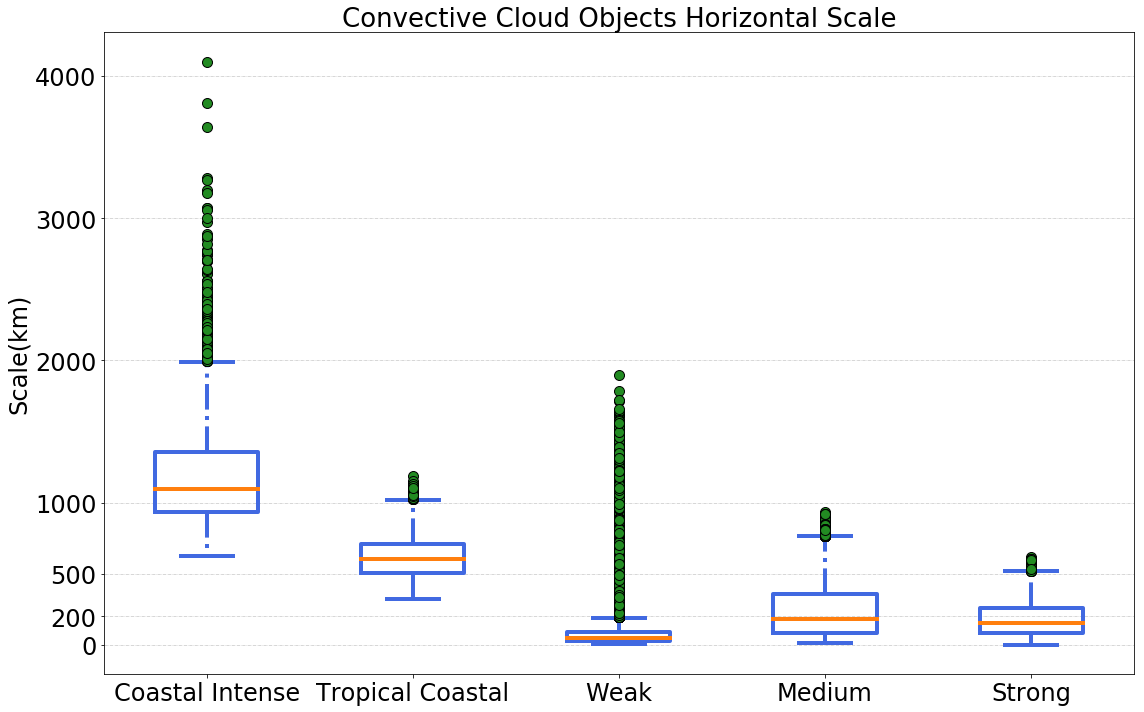

In [7]:
fig = plt.figure(figsize=(16,10)) 
draw = np.zeros((113382, 1))
k=17
for j in range(0,113382):
    # input drawing elements
    draw[j,0]=clouds[j,k]*1.4
data = [draw[hca==2,0], draw[hca==4,0], draw[hca==0,0],draw[hca==1,0], draw[hca==3,0]]

##box plot setting
c="royalblue"
flierprops = dict(marker='o', markerfacecolor='forestgreen', markersize=10,linestyle='none')
boxprops=dict(color=c,linewidth=4)
meanlineprops = dict( linewidth=4)
whiskerprops=dict(color=c,linestyle='-.',linewidth=4)
capprops=dict(color=c,linewidth=4)
##
plt.boxplot(data,widths=0.5,medianprops=meanlineprops,boxprops=boxprops,whiskerprops=whiskerprops,capprops=capprops,flierprops=flierprops)
plt.grid(True,axis='y',lw=0.5,ls='-.')

plt.title('Convective Cloud Objects Horizontal Scale', fontsize=26)
plt.ylabel('Scale(km)',fontsize=24)
plt.xticks(np.arange(1,6), ['Coastal Intense', 'Tropical Coastal', 'Weak','Medium','Strong'],fontsize=24)
plt.yticks([0,200,500,1000,2000,3000,4000],fontsize=24)
plt.tight_layout()
#plt.savefig('re_boxplot_cld_top',dpi=250)

### Redistribution cloud objects 

In [8]:
a=1
kkk=clouds[0:113382:]
#空間重分配:2度*2度
latrange=(kkk[:,3]+26)/2
lonrange=(kkk[:,4]-70)/2
#時間重分配:10天一單位
dayrange=(kkk[:,1])/10
aa=dayrange.astype(int)

print(kkk[hca==a,3])
print(latrange[hca==a,])
lat_demo=latrange.astype(int)
print(lat_demo[hca==a,])
print(aa[hca==a,])

[  8.57   4.89   2.54 ...  -3.46 -13.31 -10.09]
[17.285 15.445 14.27  ... 11.27   6.345  7.955]
[17 15 14 ... 11  6  7]
[16 16 16 ... 36 36 36]


### Spatial distribution

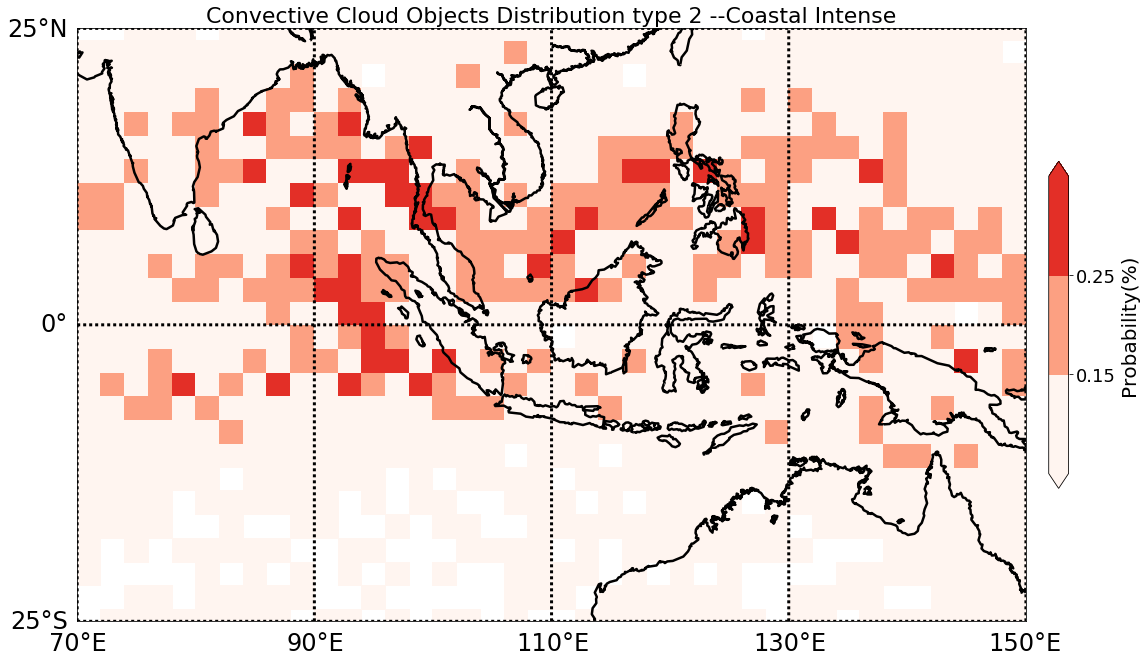

In [9]:
cmap1 = mpl.cm.Reds(np.linspace(0,1,4))
cmap = mpl.colors.ListedColormap(cmap1[0:3])
typenum=3
for i in range(2,typenum):
    z = np.zeros((26, 40))
    eventnum=np.sum(hca==i)
    for j in range(0,113328):
        if hca[j,]==i:
            z[latrange[j,].astype(int),lonrange[j,].astype(int)]= z[latrange[j,].astype(int),lonrange[j,].astype(int)]+1
            
    #draw script
    fig = plt.figure(figsize=(16,10)) 
    ## map control
    m = Basemap(llcrnrlon=70., urcrnrlon=150., llcrnrlat=-25., urcrnrlat=25.,resolution='l')
    m.drawcoastlines(linewidth=2.5)
    m.drawparallels(np.arange(-100., 120., 25.), labels=[1, 0, 0, 0], linewidth=3.0, color='k', fontsize=24)
    m.drawmeridians(np.arange(-170., 171., 20.), labels=[0, 0, 0, 1], linewidth=3.0, color='k', fontsize=24)
    
    x = np.arange(70,152,2)
    y = np.arange(-26,28,2)
    ## maskout  no cloud object grid
    y_values_masked = np.ma.masked_where(z < 1 , z*100/eventnum)
    ## darw mesh figure
    m.pcolormesh(x,y, y_values_masked,cmap=cmap,vmin=0.05,vmax=0.35)

    plt.title('Convective Cloud Objects Distribution type {0} --Coastal Intense'.format(i), fontsize=22)
    cb=plt.colorbar(aspect=15,fraction=0.02, pad=0.023, ticks=[0.15,0.25],extend='both')
    cb.ax.tick_params(labelsize=18)
    cb.set_label('Probability(%)', size=20)
    plt.tight_layout()
    #plt.savefig('new_persent_5type_type_{0}_1.png'.format(i),dpi=250)

In [10]:
from netCDF4 import Dataset

In [11]:
trmm= Dataset('mulyear_daymean_trmm_re.nc', 'r',  format='NETCDF4_CLASSIC')
pcp=trmm.variables['pcp']
print(pcp.shape)

(365, 208, 320)


In [12]:
#重分配降水資料到10天*兩度的網格
pmean = np.zeros((26,37))
for i in range(0,37):
    for j in range(0,26):
        ppp = np.mean(pcp[0+(i*10):(i+1)*10,0+(j*8):(j+1)*8,:])
        pmean[j,i]=ppp
        if i==36:
            ppp = np.mean(pcp[0+(i*10):i*10+5,0+(j*8):(j+1)*8,:])
            pmean[j,i]=ppp

In [13]:
pmean_connect=np.zeros((26,39))
esyear = np.zeros((10,208,320))
esyear[0:5,:,:] = pcp[360:365,:,:]
esyear[5:10,:,:] =pcp[0:5,:,:]
for j in range(0,26):
    ppp= np.mean(esyear[0:10,0+(j*8):(j+1)*8,:])
    pmean_connect[j,0]=ppp
    pmean_connect[j,38]=ppp
pmean_connect[:,1:38]=pmean[:,0:37]

### Temporal evolution

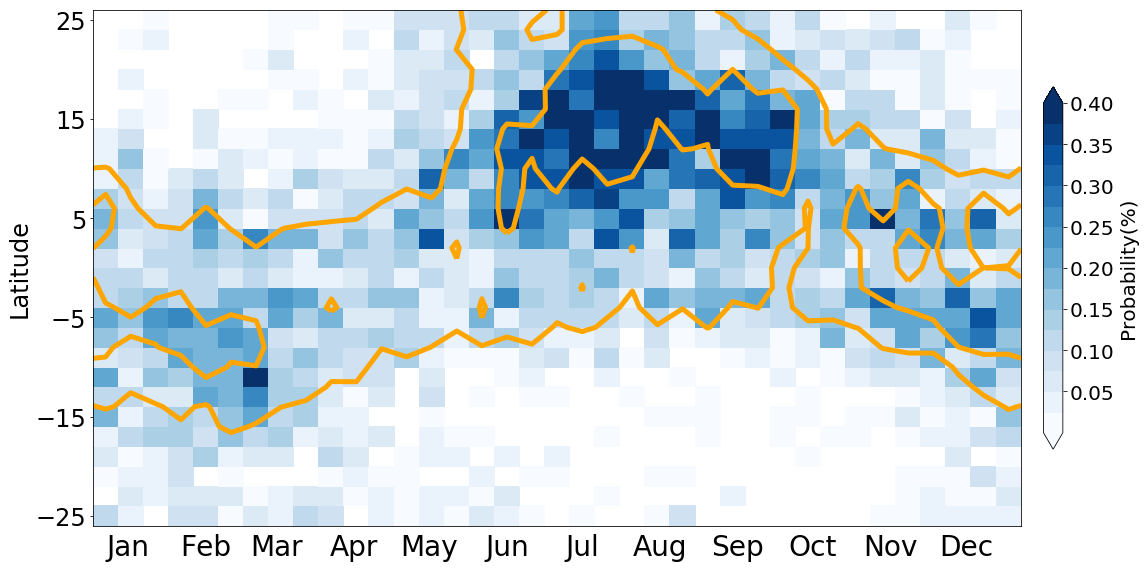

In [14]:
cmap1 = mpl.cm.Blues(np.linspace(0,1,16))
cmap = mpl.colors.ListedColormap(cmap1[0:16])
typenum=3
for i in range(2,typenum):
    z = np.zeros((26, 37))
    eventnum=np.sum(hca==i)
    for j in range(0,113382):
        if hca[j,]==i:
            z[latrange[j,].astype(int),dayrange[j,].astype(int)]= z[latrange[j,].astype(int),dayrange[j,].astype(int)]+1
            
    #draw script
    fig = plt.figure(figsize=(16,8)) 
    x = np.arange(0,380,10)
    y = np.arange(-26,28,2) 
    ## maskout  no cloud object grid
    y_values_masked = np.ma.masked_where(z < 1 , z*100/eventnum)
    ##draw mesh figure
    plt.pcolormesh(x,y,y_values_masked,cmap=cmap,vmin=0,vmax=0.4)
    
    ax = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ay = np.arange(-25,28,10)
    plt.xticks([14,45,73,104,134,165,195,226,257,287,318,348],ax)
    plt.tick_params(axis="x",labelsize=28,color='w')
    plt.yticks(ay,fontsize=24)
    plt.ylabel('Latitude',color='k',fontsize=24)
    
    cb=plt.colorbar(aspect=17,fraction=0.02, pad=0.023, ticks=[0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40],extend='both')
    cb.ax.tick_params(labelsize=20)
    cb.set_label('Probability(%)', size=20)
    
    ##draw trmm data  ---> remove this part still can draw evolution
    levels = [0.25, 0.375]
    x=np.zeros((39))
    x[1:38] = np.arange(5,370,10)
    x[0]=0
    x[38]=370
    y = np.arange(-24,27,2)
    plt.contour(x,y,pmean_connect[:,:],levels,colors=('orange'),linewidths=(5))
    ##
    plt.tight_layout()